![](https://ws1.sinaimg.cn/large/006Ww85igy1fmz5k4xgdjj30et083q44.jpg)
1. 首先要读取数据进来，读取特征存储到X，特征是一个多维向量，然后读取存储到y；  
  a. 把特征向量的每个样本点用matplotlib.pyplot绘制出来啊；  
  b. 加上颜色更清楚；   
  c. 特征点分布在特征空间中；  
2. 然后就可以操作了，首先是计算到各个点的距离distances；  
  a. 两个样本距离足够靠近的话，然后类别投票；
3. 然后是计算这些距离分别的结果是对应的什么，是0是1还是什么？  
4. 然后干嘛？？？忘记了  

KNN可以用来解决分类问题

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math # math里的sqrt和np.sqrt的区别？

In [6]:
# 一行表示一个特征向量样本，从上往下就像排队一样，又好比堆栈一样
raw_data_X = [[3.3935, 2.3312],
              [3.1100, 1.7815],
              [1.3438, 3.3683],
              [3.5822, 4.6791],
              [2.2803, 2.8669],
              [7.4234, 4.6965],
              [5.7450, 3.5339],
              [9.1721, 2.5111],
              [7.7927, 3.4240],
              [7.9398, 0.7791]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [7]:
X_train = np.array(raw_data_X) # 变成其他过程的输入了，转换过程、转换状态
y_train = np.array(raw_data_y) # 改变数据形式，原来是Python的list数据格式，现在变成

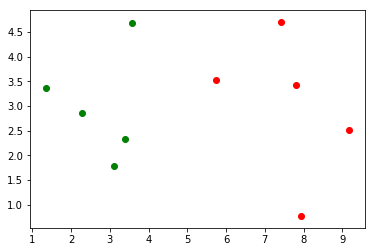

In [8]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g') # 这里的 0/1 就相当于 f_1(x)/f_2(x)
# y_train==0得到布尔列表
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r') # 这里的 0/1 就相当于 f_1(x)/f_2(x)
plt.show()

In [9]:
x = np.array([8.1234, 3.4320]) # 样本数组

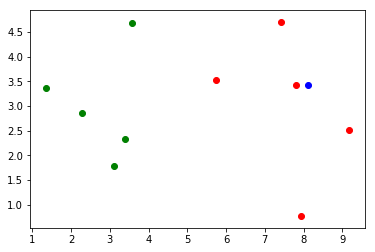

In [10]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g') # 这里的 0/1 就相当于 f_1(x)/f_2(x)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r') # 这里的 0/1 就相当于 f_1(x)/f_2(x)
plt.scatter(x[0], x[1], color='b')
plt.show()

### KNN的过程

1. 就是求出一个特征的距离向量；
2. 然后对这个距离向量从小到大排序，对索引排序因为索引保留结果信息；
3. 然后把索引改为结果，看看前k个里面的哪种结果更多；
![](https://ws1.sinaimg.cn/large/006Ww85igy1fmz5z6msj1j30fg08i751.jpg)

In [45]:
xx = [[1, 2],
      [3, 4]]
# xx**2 # 不可以list不支持元素平方操作，必须转换为np.array
xx = np.array(xx) 
xx**2 # 可以对每个元素求平方
# np.sum(xx**2) # 这个是把所有元素相加，不是预期的对行向量操作
np.sum(xx**2, axis=0) # axis=0是竖直方向

array([10, 20], dtype=int32)

In [50]:
# feature_distances = np.sqrt(X_train-x)
X_train - x
(X_train - x)**2
xx = np.array([2, 4]) # 转换为数学形式的np.array
xx ** 2 # 默认整型就是整型
np.sqrt(xx ** 2) # 对矩阵的每一个元素操作

array([ 4, 16], dtype=int32)

In [61]:
# [2, 4] 到 [1, 3] 的距离就是sqrt((2-1)^2+(4-3)^2)
feature_distances = [] # 相当于列表声明
feature_distances = np.sqrt(((X_train-x)**2)[:, 0]+((X_train-x)**2)[:, 1]) # 这个正好和上面的精简式子对应
# 因为操作都是对行向量操作的，可以用sum代替
(X_train-x)**2 # 得到每个样本的各个特征的平方矩阵
np.sum((X_train-x)**2, axis=1) # 得到每个样本的和
np.sqrt(np.sum((X_train-x)**2, axis=1)) # 得到每个样本的距离
feature_distances = []
feature_distances = np.sqrt(np.sum((X_train-x)**2, axis=0))

# 上面是利用axis来单独操作行列实现了矩阵的整体操作，简洁但是不直观，直观的方法是每次只处理一个样本，然后单独扔到一个列表里
feature_distances = [np.sqrt(np.sum((x_train-x)**2)) for x_train in X_train] # for x_train in X_train 就是每个元素看做一个向量
# 但是这样又出现了一个问题，就是用的list，所以还要再转换为np.array格式
feature_distances = np.array(feature_distances)
# list中没有argsort方法，但是np.argsort则可以处理list格式的数据，所以可以把数据都传入到np方法中去，而不是直接调用数据类型的成员方法

distances_argsort = np.argsort(feature_distances)
distances_argsort = feature_distances.argsort() # 调用了一个np.array类的成员方法argsort()
distances_argsort # 怎么自动升级为int64了
# distances_argsort其实就是邻近排序了，所以重新命名下
nearest = distances_argsort

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [66]:
# 把索引改为结果，找到索引对应的y_train的结果
y_train.shape[0] # 得到列数
# distances_y = distances_y.append([y_train[distances_argsort[i] for i in range(y_train.shape[0])]])
# [y_train[distances_argsort[i] for i in range(y_train.shape[0])]]
[distances_argsort[i] for i in range(y_train.shape[0])] # 可以运行
[y_train[distances_argsort[i]] for i in range(y_train.shape[0])] # 替换可以运行的部分

# 可以直接用for循环遍历列表的元素，而不需要用索引间接遍历，所以
[y_train[i] for i in distances_argsort]
# 因为是KNN嘛，所以判断前K个最近点topK的结果y就可以了
K = 6
topK_y = [y_train[i] for i in distances_argsort[:K]] # 0~K-1

In [68]:
topK_y # 变量一般单独写一个cell便于查看

[1, 1, 1, 1, 1, 0]

In [70]:
from collections import Counter # 引入Counter包
Counter(topK_y) # 分类数数

Counter({0: 1, 1: 5})

In [71]:
votes = Counter(topK_y) # 投票统计好了

In [72]:
winners_votes = votes.most_common(2)

In [76]:
winner_votes = votes.most_common(1)

In [77]:
winner_name = winner_votes[0][0] # 前一个0表示第1个元组，第2个0表示第1个元组的第1个元素

In [78]:
winner_name

1

In [79]:
# 实际上有意义的名字是预测
predict_y = winner_name

In [81]:
predict_y

1

np.argsort()  
from collection import Conter  
查询文档  
下一节看skilearn是如何封装算法的以及所有的算法封装的特点是什么，以及为什么这样封装？

In [82]:
a = np.array(np.arange(40).reshape(5, -1))

In [83]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39]])

In [99]:
a[[1, 3, 4], [3, 5]] # 错误

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

In [100]:
a[1, 3, 4][3, 5] # 错误

IndexError: too many indices for array

In [98]:
a[[1, 3, 4], :][:, [3, 5]]

array([[11, 13],
       [27, 29],
       [35, 37]])

In [95]:
# 推荐的写法
a[[[1, 3, 4], :], [:, [3, 5]]] # 为什么错误？但是下面的写法可以

SyntaxError: invalid syntax (<ipython-input-95-dc491526e703>, line 2)

In [96]:
a[:2, :3]

array([[ 0,  1,  2],
       [ 8,  9, 10]])

In [90]:
a[[1, 3, 4], :]

array([[ 8,  9, 10, 11, 12, 13, 14, 15],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39]])

In [91]:
a[[1, 3, 4], [3, 5]] # 错误，不应该啊，取分散的行列，不是把传两个列表就可以了吗

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

In [93]:
a[[1, 3, 4], [:, [3, 5]] # 错误

SyntaxError: invalid syntax (<ipython-input-93-e81ac5c3e142>, line 1)

In [94]:
a[[1, 3, 4], list((3, 5))] # 错误

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 